# Decision Tree Classifier VS Random Forest Classifier
## Predicting Forest Cover Type

## Decision Tree Classifier

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score

from IPython.display import Image
import pydotplus
import graphviz

import time
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# laod in data
data = pd.read_csv("covtype.csv")
df = pd.DataFrame(data)

print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [3]:
# get the shape of our data to find the number of observations and features we are working with
x,y = df.shape
print('We have {} observations in our dataset and {} features to build our model with.'.format(x, y-1))

We have 581012 observations in our dataset and 54 features to build our model with.


The dataset was downloaded from the UCI Machine Learning Repository.  According to the data dictionary provided the first 10 independent variables are continuous and the last 44 (up to the dependent variable) are binary.  40 of the last 44 columns are soil type and the other 4 represent the wilderness area.  

The four wilderness areas are located in the Roosevelt National Forest in Northern Colorado.  These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.  

Wilderness area 1 is Rawah, area 2 is Neota, area 3 is Comanche Peak, and the 4th area is Cache la Poudre.  In terms of elevation Neota has the highest mean elevation, Rawah and Comanche Peak have lower mean elevations, and Cache la Poudre has the lowest.

The outcomes available for the dependent variable are 1-7, each corresponding to a different forest cover type. 
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [4]:
# check for null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

We have no missing data.  Let's makes sure we don't have any duplicates.

In [5]:
df.drop_duplicates(inplace=True)
print(df.shape)

(581012, 55)


We didn't have any duplicates.

In [28]:
# Create our features and dependent variable
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]
def runtree(x, y, features, depth, criterion='entropy'):
    
    #initialize our time
    start = time.time()

    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(criterion=criterion, max_features=features, max_depth=depth)

    # Fit the model
    decision_tree.fit(X, Y)

    # Predict X
    Y_ = decision_tree.predict(X)

    # Get accuracy of model
    score = decision_tree.score(X,Y)
    #accuracy = accuracy_score(Y, Y_) same as above

    # End time
    end = time.time()

    print('Score: ', score)
    #print('Accuracy: ', accuracy)
    print('Time to fit, predict, and score: {0:.4f}s'.format(end-start))

In [29]:
runtree(X,Y,10,10)

Score:  0.7019923856994348
Time to fit, predict, and score: 1.0385s


In [8]:
def optimize_tree(x, y, k, n):
        
    #initialize our time
    start = time.time()
    
    # Create empty list for scores and i,j
    accuracylist = []
    runnum = []
    
    # loop through k features to find best score
    for i in range(1, k+1):
        for j in range(1, n+1):
            # Initialize and train our tree.
            decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features=i, max_depth=j)

            # Fit the model
            decision_tree.fit(X, Y)

            # Predict X
            Y_ = decision_tree.predict(X)
        
            # Score model
            accuracyscore = decision_tree.score(X,Y)
        
            # Print score and k
            #print('{},{}: {}'.format(i,j, accuracyscore))
            
            # Create accuracy list and run number list
            accuracylist.append(accuracyscore)
            runnum.append(tuple((i,j)))
            
    # Find max values for accuracy and tuple(i,j)
    xmax = runnum[np.argmax(accuracylist)]
    ymax = max(accuracylist)
    
    # Add text to plot
    text= "{}, y={:.3f}".format(xmax, ymax)
    
    # Plot the figure
    fig, ax = plt.subplots()
    plt.scatter(range(1,len(runnum)+1), accuracylist, marker='o')
    plt.title('Finding Optimized Number of Features and Depth')
    ax.annotate(text, xy=(np.argmax(accuracylist), ymax+0.01))

    plt.show()
        
    # End time
    end = time.time()
    print('Time: {0:.02f}s'.format(end-start))

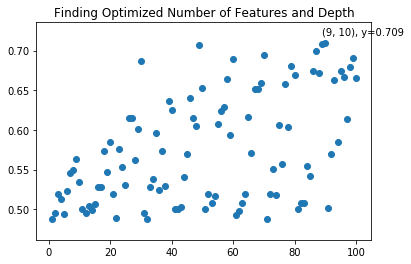

Time: 56.86s


In [9]:
optimize_tree(X, Y, 10, 10)

We have a function that will find the optimal number of features and depth but runs too slow with all the data.  Let's try to find out what the most important features are using the feature_importances_ method.

In [10]:
# Initialize a model to find the most important features 

# We will use the optimized features number and depth found above
model = tree.DecisionTreeClassifier(criterion='entropy', max_features=10, max_depth=10)

# Fit data
model.fit(X,Y)

Importance = pd.DataFrame(
    model.feature_importances_, 
    index = X.columns, 
    columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

print(Importance.head(25))

                                    Feature Importance
Wilderness_Area4                              0.292185
Elevation                                     0.272997
Soil_Type4                                    0.071769
Soil_Type2                                    0.059291
Soil_Type39                                   0.054876
Horizontal_Distance_To_Roadways               0.048610
Soil_Type10                                   0.046321
Soil_Type22                                   0.035928
Horizontal_Distance_To_Fire_Points            0.024946
Wilderness_Area3                              0.016645
Wilderness_Area2                              0.016361
Horizontal_Distance_To_Hydrology              0.010810
Vertical_Distance_To_Hydrology                0.009148
Aspect                                        0.008958
Hillshade_9am                                 0.007884
Hillshade_Noon                                0.004865
Hillshade_3pm                                 0.003929
Wilderness

In [11]:
####### Having trouble with the rendering - Graphviz executables not found 
####### Tried adding to path still didn't work - not sure what the issue is

# Render our tree.
#dot_data = tree.export_graphviz(
    #decision_tree, out_file=None,
    #feature_names=X.columns,
    #class_names=['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'],
   #filled=True)
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

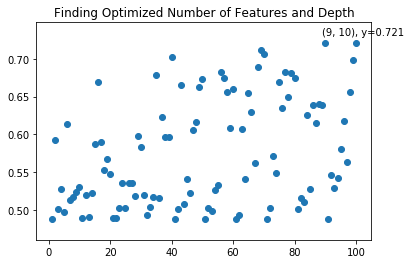

Time: 57.32s


In [53]:
# Create new X containing the top features that have an importance >= 0.01
ind = Importance[Importance['Feature Importance'] >= 0.01].index
X1 = df.loc[:,ind]

# Re optimize features and depth with new X
optimize_tree(X1, Y, 10, 10)

Looks like including only the top 25 features gets us to the same 72% accuracy.  We know we have a mix of continuous variables and binary, so let's try running on only the continuous and only the binary to see what happens.

In [13]:
# create continuous features only
cont_feat = df.iloc[:, :10]
#print(cont_feat.columns)

# Create binary features only
binary_feat = df.iloc[:,10:54]
#print(binary_feat.columns)

# since we are seeing an optimal number of features and depth around 10 and 10 we will continue to use those values-for now
print('Continuous Features Only')
runtree(cont_feat, Y, 10, 10)
print('')
print('Binary Features Only')
runtree(binary_feat, Y, 30, 30)

Continuous Features Only
Score:  0.7042143707875225
Time to fit, predict, and score: 1.0904s

Binary Features Only
Score:  0.9987074277295478
Time to fit, predict, and score: 4.2994s


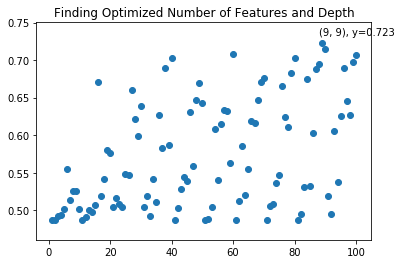

Time: 55.21s


In [14]:
optimize_tree(cont_feat, Y, 10, 10)

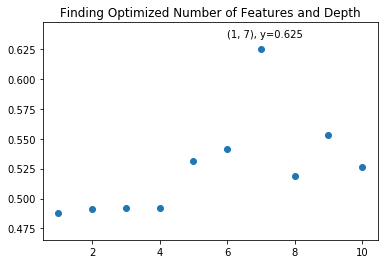

Time: 3.96s


In [15]:
optimize_tree(cont_feat, Y, 1, 10)

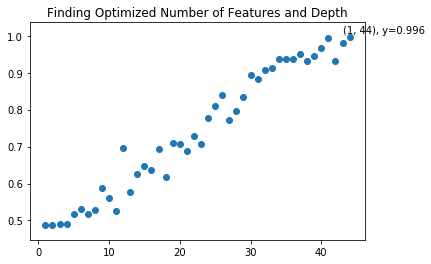

Time: 38.82s


In [16]:
optimize_tree(binary_feat, Y, 1, 44)

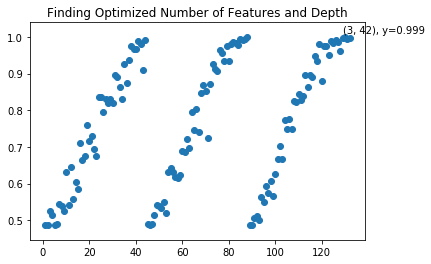

Time: 126.94s


In [17]:
optimize_tree(binary_feat, Y, 3, 44)

It is fairly obvious that we can see that the more depth we have in our tree the higher the accuracy gets.  This would make sense at it would likely be overfitting the data after a certain depth.  Let's dig into this and train a data set and test it on a test set to make sure we are not overfitting.

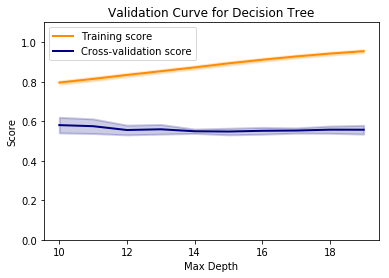

In [20]:
# First find the params for the estimator
model.get_params().keys()

# We will use the full dataset at first

# set the parameter range
param_range = range(10, 20)

# get the training and test scores for the validation cure plot - using the max_depth parameter
train_scores, test_scores = validation_curve(
    tree.DecisionTreeClassifier(criterion='entropy'), 
    X, Y, 
    param_range=param_range,
    param_name='max_depth',
    cv=5, scoring='accuracy')

# Get means and std for train and test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# set up plot
plt.title("Validation Curve for Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

# plot data
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

We can see that the score for the training set is increasing as we increase the depth, which is increasing the overfitting.  It appears that the cross validation is pretty stable at around .6.  The first time running this function is used a parameter range of 1-10 and saw that the cross val was still around .6.

In [26]:
# Let's try to find the optimal parameters for our model using GridSearchCV

# Get the parameters again
#print(model.get_params().keys())

# Set up a param_grid
param_grid = {'criterion':['entropy', 'gini'], 
              'max_depth':[10, 20, 30, 40, 50], 
              'max_features':[1, 2, 3, 4, 5]}
CV_tree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)

CV_tree.fit(X, Y)
#CV_tree.best_params_

# careful running this it is slow!

{'criterion': 'gini', 'max_depth': 10, 'max_features': 5}

In [31]:
runtree(X,Y,5,10,'gini')

Score:  0.7233206887293205
Time to fit, predict, and score: 0.7151s


After running the GridSearchCV we have the best parameters to run our decision tree: 
* criterion = gini
* max_depth = 10 from list of [10, 20, 30, 40, 50]
* max_features = 5 from list of [1, 2, 3, 4, 5]   

It took too long to run with more parameter information

## Simple Random Forest

In [40]:
rfc = ensemble.RandomForestClassifier()

def randomforest(x, y, cv=10):
    
    starttime = time.time()
    print(cross_val_score(rfc, x, y, cv=cv))
    endtime = time.time()

    print('Time in sec: {0:.05f}s'.format(endtime-starttime))

In [41]:
randomforest(X,Y)

[0.68726766 0.58843777 0.72715695 0.63746515 0.50267637 0.63220943
 0.61974837 0.57548323 0.5652593  0.65674108]
Time in sec: 87.53369s


In [42]:
randomforest(binary_feat, Y)

[0.59099201 0.61471869 0.73426501 0.68207635 0.63942101 0.55933633
 0.60692587 0.69264531 0.58006162 0.57534553]
Time in sec: 24.71824s


In [43]:
randomforest(cont_feat, Y)

[0.6884896  0.57664837 0.70832831 0.62340367 0.53209067 0.64931757
 0.62074663 0.58402038 0.52045646 0.61994182]
Time in sec: 105.42600s


In [54]:
randomforest(X1,Y)

[0.64993804 0.57088274 0.69574721 0.61297374 0.47451851 0.61535946
 0.59004148 0.57914938 0.51599855 0.676139  ]
Time in sec: 62.98037s
